# Symbolic Math

We already covered how to do numerical math! For instance, we can assign a value to x and then calculate $(x^2-9)^3$

```
x=np.linspace(0,10,100)
f=(3*x**2+5)**3
```
But what if I want to do symbolic operations? Sometimes you may need that instead of calculating numbers directly


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp #Symbolic math!

In [11]:
x=sp.symbols('x')
f=(x**2-9)**3
display(f) #okay but what is it?

(x**2 - 9)**3

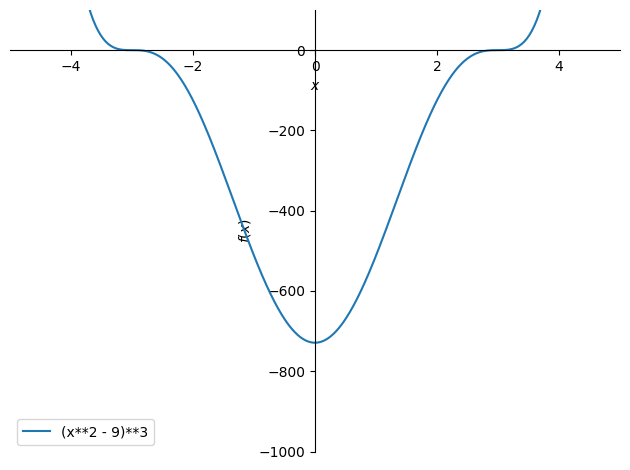

In [12]:
sp.plot(f,xlim=(-5,5),ylim=(-1000,100),legend=True) #plot can do so much more! Google sp.plot

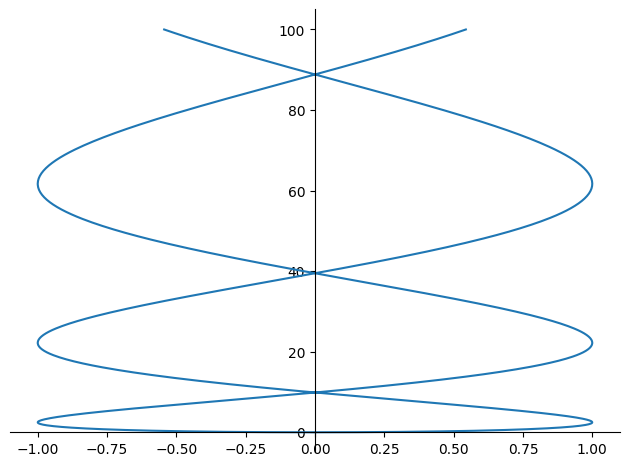

In [ ]:
from sympy.plotting import plot_parametric
y1=sp.sin(x)
y2=x**2
plot_parametric(y1,y2)

In [ ]:
#I mean okay, how can I possibly use this? Well you can do other things
f_exp=sp.expand(f)
display(f_exp)
display(sp.factor(f_exp))

x**6 - 27*x**4 + 243*x**2 - 729

(x - 3)**3*(x + 3)**3

In [ ]:
g=f_exp/x**2
display(g) #I mean I guess, but we can clearly simplify this expression right?
display(sp.simplify(g)) #much better

(x**6 - 27*x**4 + 243*x**2 - 729)/x**2

x**4 - 27*x**2 + 243 - 729/x**2

We can even evaluate these functions at real numbers


In [ ]:
display(f)
display(g)

(x**2 - 9)**3

(x**6 - 27*x**4 + 243*x**2 - 729)/x**2

In [ ]:
display(f.subs(x,0)) #cube of 9
print(sp.N(f.subs(x,0))) #turn into a number!
display(g.subs(x,2)) #f at 2
print(sp.N(g.subs(x,2)))
display(g.subs(x,0)) #f at 0

-729

-729.000000000000


-125/4

-31.2500000000000


zoo

In [ ]:
#subbing multiple values!
x, y=sp.symbols('x y')
f=x**2+y**2
display(f)

x**2 + y**2

In [ ]:
numerical={x:2,y:2} #this is a dict
f.subs(numerical)

8

In [ ]:
#I can even make more complicated functions with subs
g_comp=g.subs(x,f)
display(g_comp)
display(sp.simplify(g_comp))

((x**2 - 9)**18 - 27*(x**2 - 9)**12 + 243*(x**2 - 9)**6 - 729)/(x**2 - 9)**6

(x**2 - 9)**12 - 27*(x**2 - 9)**6 + 243 - 729/(x**2 - 9)**6

We can even use this to solve equations!

In [ ]:
sp.Eq(f,0)

Eq((x**2 - 9)**3, 0)

In [ ]:
sp.solveset(sp.Eq(f,0),x) #solve for x

{-3, 3}

In [ ]:
sp.Eq(f,g)

Eq((x**2 - 9)**3, (x**6 - 27*x**4 + 243*x**2 - 729)/x**2)

In [ ]:
sp.solveset(sp.Eq(f,g),x) #solve for x

{-3, -1, 1, 3}

Solving a system of equations!

In [5]:
y=sp.symbols('y')
expr1=sp.Eq(3*x+4*y,13)
expr2=sp.Eq(2*x-5*y,1)
display(expr1,expr2)
solution = sp.linsolve([expr1,expr2],(x,y)) #linear system of equations

Eq(3*x + 4*y, 13)

Eq(2*x - 5*y, 1)

In [ ]:
x_sol,y_sol = solution.args[0] #This is how we extract
display(x_sol,y_sol)
print(sp.N(x_sol)) #this is numerica

3

1

3.00000000000000


In [ ]:
#These do not have to be numbers!
x, y, k1, k2, a1, a2=sp.symbols('x y k1 k2 a1 a2')
expr1=sp.Eq(k1*x+4*y,a1)
expr2=sp.Eq(k2*x-5*y,a2)
display(expr1,expr2)
sp.linsolve([expr1,expr2],(x,y)) #linear system of equations

Eq(k1*x + 4*y, a1)

Eq(k2*x - 5*y, a2)

{((5*a1 + 4*a2)/(5*k1 + 4*k2), (a1*k2 - a2*k1)/(5*k1 + 4*k2))}

In [ ]:
expr3=sp.Eq(x*y,15)
expr4=sp.Eq(x**2+y**2,34)
display(expr3,expr4)
sp.nonlinsolve([expr3,expr4],(x,y)) #linear system of equations

Eq(x*y, 15)

Eq(x**2 + y**2, 34)

{(-5, -3), (-3, -5), (3, 5), (5, 3)}

##Exercise!
For a simply supported beam with a point load P, the support reactions could be written as

* $F_a+F_b-P=0$
* $F_a(L)+-P(L-x)=0$

And then
1. Solve $F_a$ and $F_b$ in terms of $L,P,x$
2. Find the exact value at $P= 100, L= 10, x=6$


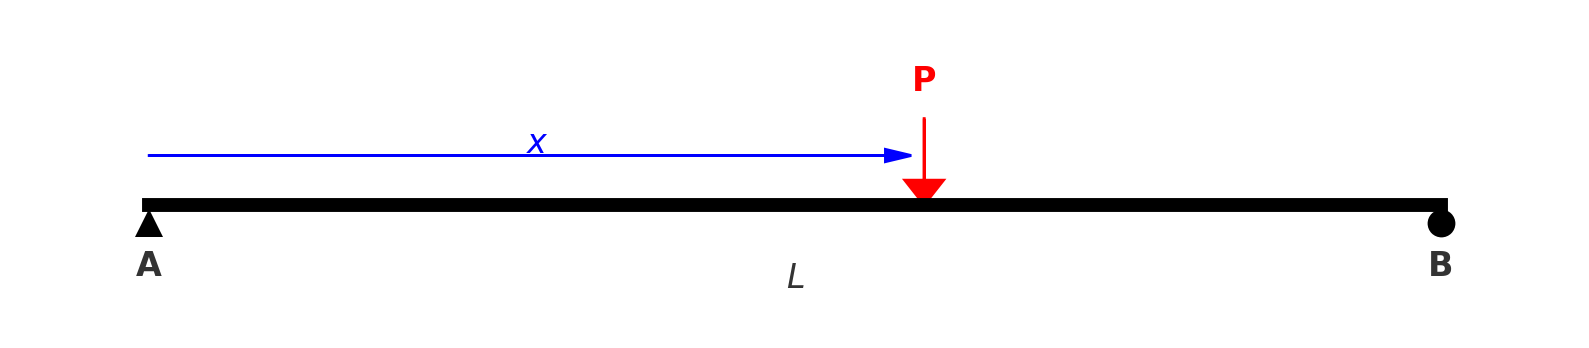

In [ ]:
#These do not have to be numbers!
x, L, P, Fa, Fb = sp.symbols('x L P Fa Fb')
expr1=sp.Eq(Fa+Fb-P,0)
expr2=sp.Eq(Fa*L-P*(L-x),0)
display(expr1,expr2)
solution = sp.linsolve([expr1,expr2],(Fa,Fb)) #linear system of equations
solution

Eq(Fa + Fb - P, 0)

Eq(Fa*L - P*(L - x), 0)

{((L*P - P*x)/L, P*x/L)}

In [ ]:
Fa_sol, Fb_sol = solution.args[0]  # Extract Fa and Fb solutions
Fa_sol

(L*P - P*x)/L

In [ ]:
numerical_values = {P: 100, L: 10, x: 6}
Fa_val = Fa_sol.subs(numerical_values)
Fb_val = Fb_sol.subs(numerical_values)
print(Fa_val, Fb_val)

40 60


Matrices


In [ ]:
M = sp.Matrix([[1, x], [-2, y]])
N = sp.Matrix([[x, 3], [y, 7]])
display(M,N)

Matrix([
[ 1, x],
[-2, y]])

Matrix([
[x, 3],
[y, 7]])

In [ ]:
display(M+N)
display(M*N)

Matrix([
[x + 1, x + 3],
[y - 2, y + 7]])

Matrix([
[    x*y + x, 7*x + 3],
[-2*x + y**2, 7*y - 6]])

Final Show off - 3D plotting

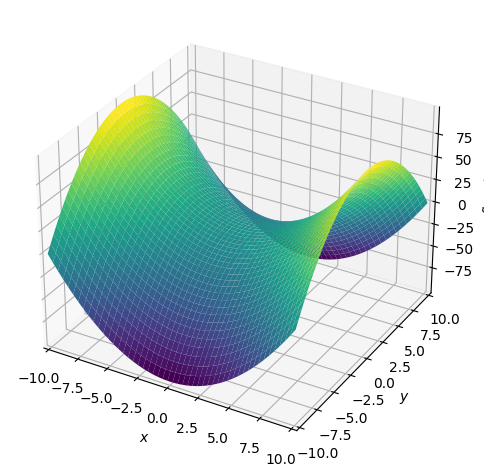

In [ ]:
z=x**2-y**2
sp.plotting.plot3d(z)

# Integration and Differentiation!
Let's re-visit your favourite topics.

## Differentiation

Differentiation is a fundamental concept in calculus used to determine the rate at which a function changes at any point. The derivative of a function $f(x)$ at a point $x$ can be calculated using the limit definition:

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$


Here, $f'(x)$ represents the derivative of $f$ at $x$. The expression $\frac{f(x+h) - f(x)}{h}$ calculates the average rate of change of the function $f$ over a small interval $h$. As $h$ approaches zero, this average rate of change approaches the instantaneous rate of change at $x$, which is the derivative.

at the limit, we should get the slope of the tangent line at $x$. [Example](https://www.malinc.se/math/calculus/diffatpointen.php)

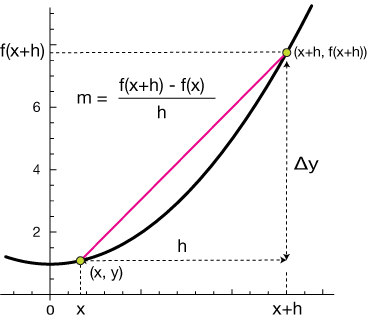

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp #Symbolic math!

Let's start off easy, Consider the function $f(x) = 3x^2+2x$  

In [ ]:
x=sp.symbols('x')
f=3*x**2+2*x
display(f) # that is cool!

3*x**2 + 2*x

In [ ]:
#Let's take the derivative of f
df=sp.Derivative(f,x)
df #not exactly what I want is it?

Derivative(3*x**2 + 2*x, x)

In [ ]:
df=sp.diff(f,x) #f with respect to x
df
#df.subs(x,2)

6*x + 2

In [ ]:
sp.diff(f,x,2) #f with respect to x twice

6

In [ ]:
sp.diff(sp.sin(x),x) #must use sp functions!

cos(x)

Let's contiue with the derivative

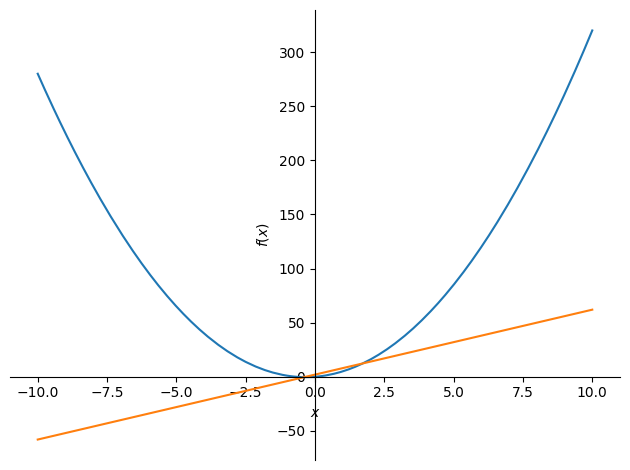

In [ ]:
sp.plot(f,df) #it can do so much more just google sympy plot

###**EXERCISE:**

Derivatives

An object follows a path

$$
d(t)=20+0.2t^3+15*sin(x)
$$

Find and print it's velocity and acceleration. Plot it's position, velocity and acceleration between 0 and 10 seconds

0.4*t + 15*cos(t)

0.4 - 15*sin(t)

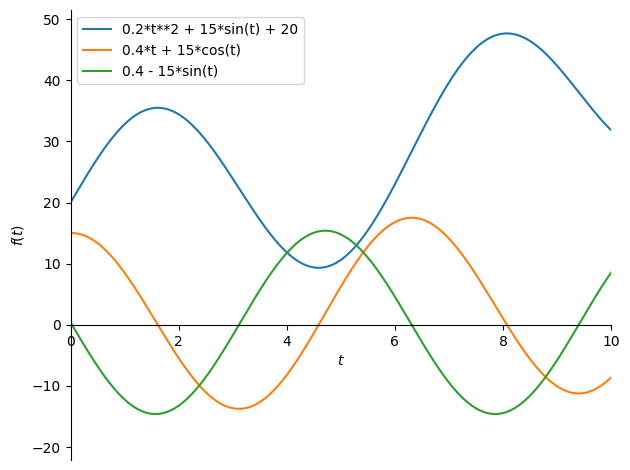

In [ ]:
from sympy.plotting import plot_parametric
t=sp.symbols('t')
dt=20+0.2*t**2+15*sp.sin(t)

vt=sp.diff(dt,t,1) #f with respect to x twice
at=sp.diff(dt,t,2) #f with respect to x twice

display(vt)
display(at)
sp.plot(dt,vt,at, xlim=(0,10),legend=True)

###**EXERCISE:**

Well, let's see if we can do this operation numerically with tools we learned before. Write a function that calculates the numerical derivative of a function using the limit definition



```
def diff(f,x,h=0.01):
  return # the derivative at that point
```



In [ ]:
def diff(f,x,h=0.01):
  return (f(x+h)-f(x))/(h)

In [ ]:
func = lambda x : 3*x**2+2*x #map x to our function
num_df=diff(func,0)
print(num_df)
print(diff(func,0,h=1))
print(diff(func,0,h=0.001))

2.0300000000000002
5.0
2.003


In [ ]:
df=sp.diff(f,x) #f with respect to x
df.subs(x,0)

2

**Why is this useful? - SKIP UNTIL INTEGRATION**

When we work in the real world, we collect points. We rarely have well-behaved analytical functions. Here is an example data from an earthquake. Notice how we have discrete set of points and not a function. Therefore, we can only do numerical operations on this dataset

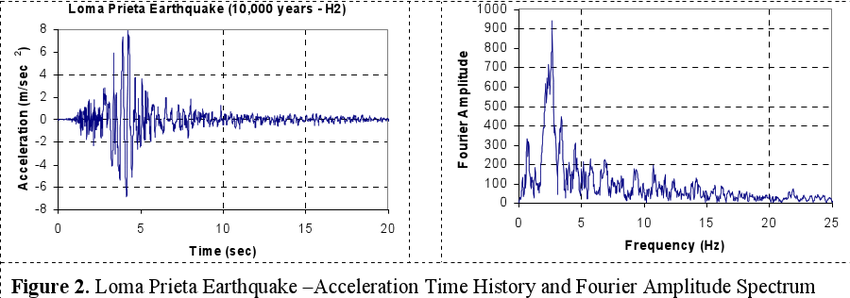

**Exercise!**
Consider the function $sin(x)$

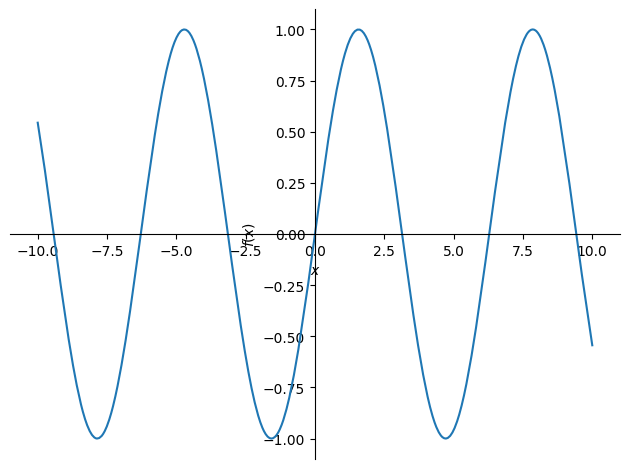

In [ ]:
sx=sp.sin(x) #symbolic

sp.plot(sx)

First! Compute the analytical integral at any point using Sympy!
Your code should should use xp as a variable. and you should calculate analytical derivative at xp. Does the result make sense? It should give you $cos(x)$



```
xp=0
#your code using diff and subs
#calculate d/dx (sin(x)) at xp
```



In [ ]:
xp=0
sp.diff(sx,x).subs(x,xp)

1

Now, do the same thing numerically. How would you calculate the derivative at any given points (any given xs)?

Hint: given xs is an array of x values, it's consecutive elements should give you $h$ or $\Delta x$



```
xp=0 #value of interest
ind=np.where(np.isclose(xs,xp))[0][0] #find the index of the value of interest
h=#your code here, find h using xs and ind
#use the sinx array to calculate the derivative to approximate d/dx (sin(x)) at xp
```



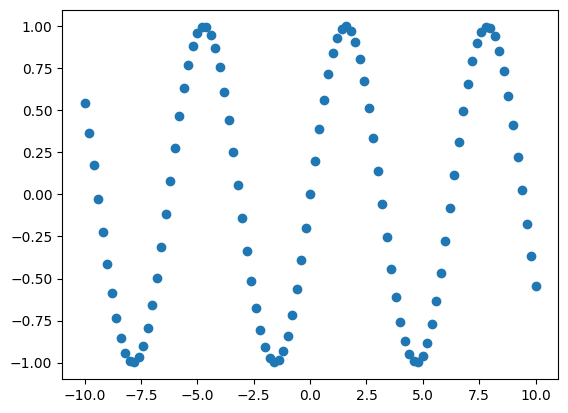

In [ ]:
xs=np.linspace(-10,10,101) #use this to generate
sinx=np.sin(xs) #numeric
plt.scatter(xs,sinx)

In [ ]:
xs[32]

-3.5999999999999996

In [ ]:
xp=3.6
ind=np.where(np.isclose(xs,xp))[0][0]
s1=sinx[ind]
s2=sinx[ind+1]
h=xs[ind+1]-xs[ind]

num_df=(s2-s1)/h
print(num_df)

#calculate with sympy
display(float(sp.diff(sx,x).subs(x,xp)))

-0.8466872382393326


-0.896758416334147

In [ ]:
np.isclose(xs,xp)

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

##Differential Equations

In [ ]:
# Define f as a function of x
x = sp.symbols('x')
f = sp.Function('f')(x)

# Define the derivative
fp = sp.Derivative(f, x)
display(fp)  # This will display the derivative f'(x)

# Define the differential equation
Eq = sp.Eq(fp, f)
display(Eq)  # This will display the equation f'(x) = f(x)

# Solve the differential equation
solution = sp.dsolve(Eq)
display(solution)  # This will display the solution

Derivative(f(x), x)

Eq(Derivative(f(x), x), f(x))

Eq(f(x), C1*exp(x))

In [8]:
# Define f as a function of x
x = sp.symbols('x')
f = sp.Function('f')(x)

# Define the derivative
fp = sp.Derivative(f, x,2)
display(fp)  # This will display the derivative f'(x)

# Define the differential equation
Eq = sp.Eq(fp, -f)
display(Eq)  # This will display the equation f'(x) = f(x)

# Solve the differential equation
solution = sp.dsolve(Eq)
display(solution)  # This will display the solution

Derivative(f(x), (x, 2))

Eq(Derivative(f(x), (x, 2)), -f(x))

Eq(f(x), C1*sin(x) + C2*cos(x))

## Integration and Approximation Methods

Integration is a fundamental concept in calculus used to determine the accumulated quantity over an interval. The integral of a function \( f(x) \) over an interval from \( a \) to \( b \) is calculated using the definite integral:

$$
\int_a^b f(x) \, dx
$$

Here, \( \int_a^b f(x) \, dx \) represents the integral of \( f \) from \( a \) to \( b \). This operation calculates the area under the curve of the function \( f(x) \) from \( x = a \) to \( x = b \). Integration is often seen as the reverse process of differentiation.

If \( F(x) \) is an antiderivative of \( f(x) \), meaning \( F'(x) = f(x) \), then the definite integral of \( f \) from \( a \) to \( b \) can be evaluated using the Fundamental Theorem of Calculus as follows:

$$
\int_a^b f(x) \, dx = F(b) - F(a)
$$

This calculation provides the net area between the function \( f(x) \) and the x-axis, adjusted for any portions where the function dips below the axis.

### Numerical Approximations of Integrals

In practice, especially when an antiderivative is difficult to find or the function is available only through data points, numerical methods such as the Riemann sum and the trapezoidal rule are used to approximate integrals.

#### Riemann Sum Approximation

The Riemann sum approximates the integral by dividing the area under the curve into small rectangles and summing their areas. The approximation becomes better as the number of rectangles increases. The simplest form of the Riemann sum uses left endpoints for heights of rectangles:

$$
\int_a^b f(x) \, dx \approx \sum_{i=0}^{n-1} f(x_i) \Delta x
$$

where $\Delta x = \frac{b-a}{n} $ and $ x_i = a + i\Delta x $.

As $n $ approaches infinity, the Riemann sum converges to the exact value of the integral, which can be expressed by the limit definition:

$$
\int_a^b f(x) \, dx = \lim_{n \to \infty} \sum_{i=0}^{n-1} f(x_i) \Delta x
$$

[Example](https://demonstrations.wolfram.com/RiemannSums/)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp #Symbolic math!

Let's consider the function $f(x)=3x^2$.

In [ ]:
x=sp.symbols('x')
f=3*x**2
display(f) # that is cool!

3*x**2

x**3

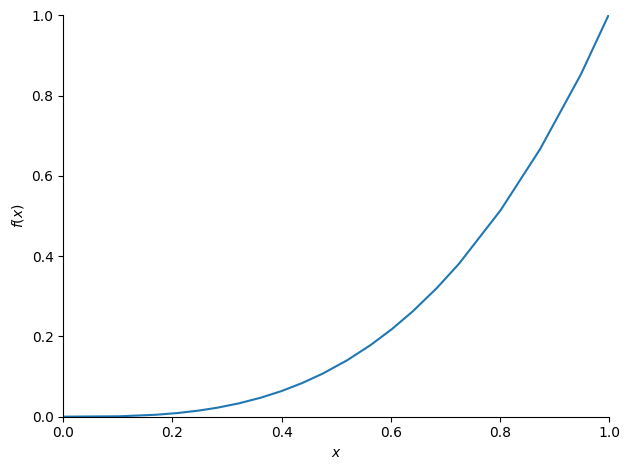

In [ ]:
f_int=sp.integrate(f,x) #this is the integral
display(f_int)
sp.plot(f_int,xlim=[0,1],ylim=[0,1])

Let's calculate the integral $\int_{0}^1 3{x^2} dx$

In [ ]:
sp.integrate(f, (x, 0, 1)) #this is the area under the curve

1

Let's see if we can do this numerically

In [ ]:
func = lambda x : 3*x**2 #map x to our function
h=0.1 #deltax
xs=np.arange(0,1+h,h)
print(xs)
print(func(xs))


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.   0.03 0.12 0.27 0.48 0.75 1.08 1.47 1.92 2.43 3.  ]


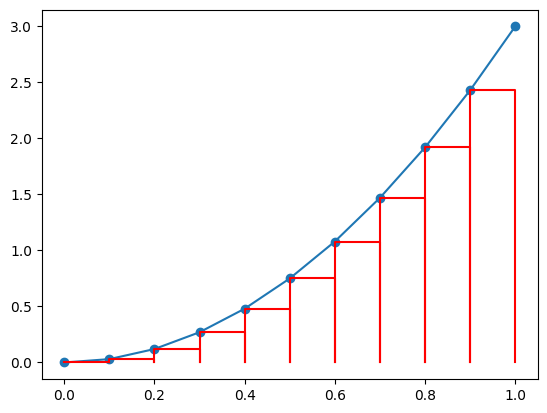

In [ ]:
plt.plot(xs,func(xs),marker='o')

for x in xs[:-1]:  # Exclude the last point to prevent rectangle outside range
    plt.plot([x, x, x + h, x + h], [0, func(x), func(x), 0], 'r')  # Plot rectangle


###**EXERCISE!**

Write a function that executes numerical integration using riemann sums. Your function should look like this:

Hint: Try to use numpy operations such as arange and sum to avoid using for loops!

```
def integ(f,a,b,h=0.01):
  #your code here
  return #integral of f between a and b
```



In [ ]:
def integ(f,a,b,h=0.01):
  xs=np.arange(a,b+h,h)
  return np.sum(f(xs)*h)

In [ ]:
func = lambda x : 3*x**2 #map x to our function
num_df=integ(func,0,1,h=0.1)
print(num_df)
print(integ(func,0,1,h=0.05))
print(integ(func,0,1,h=0.001))

1.1550000000000002
1.0762500000000004
1.0015005000000001


##Multiple integrals


In [ ]:
x,y =sp.symbols('x y')
f=3*x**2 + 3*x*y + y**2
display(f) # that is cool!


3*x**2 + 3*x*y + y**2

Say you want to integrate this for x between 0 - 1 and y between -1 and 0

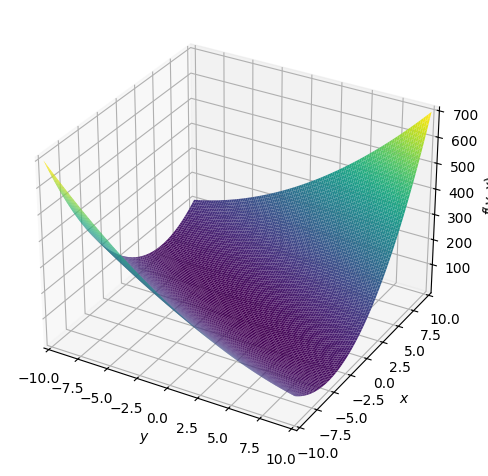

In [ ]:
sp.plotting.plot3d(f)

In [ ]:
#First way
sp.integrate(sp.integrate(f, (y,-1,0)),(x,0,1))

7/12

In [ ]:
#second way
sp.integrate(f,(x,0,1),(y,-1,0))

7/12